# 04. K-Means Clustering with Sentiment Analysis
> 감성 분석 결과를 추가한 K 평균 군집 분석 

## 환경 설정

라이브러리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

<br>
<br>

## 1. K-Means Clustering

기존 데이터에 감성 분석 기반의 긍정부정도를 새로운 변수로 추가한 데이터를 분석에 맞게 수정한다.

In [ ]:
area0 = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/final_area0.csv")
area1 = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/final_area1.csv")
area2 = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/final_area2.csv")
area3 = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/final_area3.csv")
sales_data = pd.read_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/sales_data.csv')

In [ ]:
area0 = area0.drop(['Unnamed: 0'], axis=1)
area1 = area1.drop(['Unnamed: 0'], axis=1)
area1 = area1.drop(['Unnamed: 0.1'], axis=1)
area2 = area2.drop(['Unnamed: 0'], axis=1)
area3 = area3.drop(['Unnamed: 0'], axis=1)

In [ ]:
area0.columns = ['상권_코드_명', '행정동', '긍정 리뷰 비율', '총_생활인구_수', '총_직장_인구_수', '아파트_단지_수',
                 '집객시설_수', '교통시설_수', '학교_수', '총_상주인구_수', 'cluster']

In [ ]:
area3.columns = ['상권_코드_명', '행정동', '긍정 리뷰 비율', '총_생활인구_수', '총_직장_인구_수', '아파트_단지_수',
                 '집객시설_수', '교통시설_수', '학교_수', '총_상주인구_수', 'cluster']

In [ ]:
area_data = pd.concat([area0, area1, area2, area3])

In [ ]:
area_data = area_data[['상권_코드_명', '행정동', '긍정 리뷰 비율', '총_생활인구_수', '총_직장_인구_수', '아파트_단지_수',
                       '집객시설_수', '교통시설_수', '학교_수', '총_상주인구_수', 'cluster']]

In [ ]:
area_data.head()

,상권_코드_명,행정동,긍정 리뷰 비율,총_생활인구_수,총_직장_인구_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,총_상주인구_수,cluster
0,구로디지탈1단지,구로디지털단지,0.163,0.135935,1.000000,0.019108,0.204433,0.363636,0.0,0.066200,0
1,서울 중구 충무로역_2,충무로역,0.278,0.196221,0.374003,0.002123,0.157635,0.113636,0.0,0.092767,0
2,영등포전통시장,영등포전통시장,0.344,0.253975,0.048658,0.006369,0.322660,0.454545,0.0,0.196497,0
3,종암로19길,종암동,0.360,0.158126,0.418446,0.048832,0.061576,0.227273,0.0,0.162453,0
4,압구정 로데오거리_1,압구정로데오거리,0.403,0.168727,0.333570,0.029724,0.290640,0.113636,0.0,0.058965,0


상권 분류를 위해 수치형 데이터인 `num_data` 데이터를 뽑아둔다

In [ ]:
num_columns = ['총_생활인구_수', '총_직장_인구_수', '아파트_단지_수', '집객시설_수', '교통시설_수', '학교_수', '총_상주인구_수', '긍정 리뷰 비율']
num_data = area_data[num_columns].groupby(area_data['상권_코드_명']).mean()

<br>

### 1-1. 클러스터의 개수 k 설정

In [ ]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(num_data)
    wss.append(kmeans.inertia_)

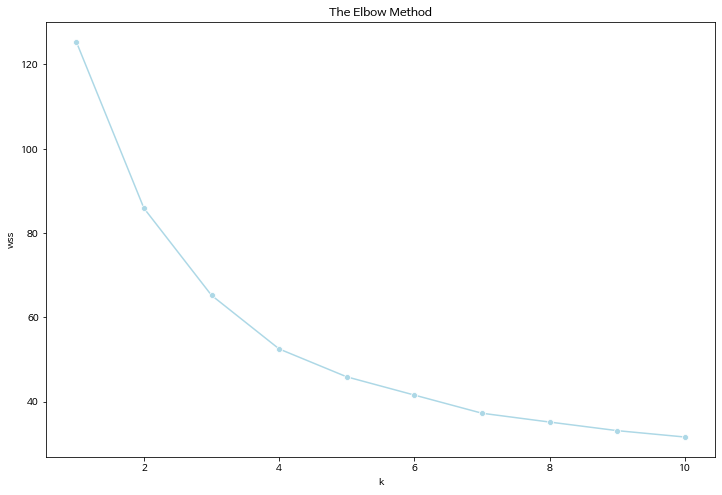

In [ ]:
plt.figure(figsize= (12, 8))
sns.lineplot(range(1, 11), wss, marker='o', color='lightblue')
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('wss')
plt.show()

In [ ]:
best_n = 1 
best_score = -1

for n_cluster in range(2, 11): 
  kmeans = KMeans(n_clusters=n_cluster) 
  kmeans.fit(num_data) 
  cluster = kmeans.predict(num_data) 
  score = silhouette_score(num_data, cluster)

  print('k = {} 일 때의 실루엣 점수 : {:.2f}'.format(n_cluster, score))

  if score > best_score :
      best_n = n_cluster
      best_score = score

print('k = {} 일 때 가장 높은 실루엣 점수 {:.2f}을 얻는다'.format(best_n, best_score))

k = 2 일 때의 실루엣 점수 : 0.46
k = 3 일 때의 실루엣 점수 : 0.36
k = 4 일 때의 실루엣 점수 : 0.36
k = 5 일 때의 실루엣 점수 : 0.29
k = 6 일 때의 실루엣 점수 : 0.30
k = 7 일 때의 실루엣 점수 : 0.27
k = 8 일 때의 실루엣 점수 : 0.26
k = 9 일 때의 실루엣 점수 : 0.26
k = 10 일 때의 실루엣 점수 : 0.25
k = 2 일 때 가장 높은 실루엣 점수 0.46을 얻는다


<br>

### 1-2. 클러스터링

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster = kmeans.fit_predict(num_data)
cluster

array([3, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
num_data['cluster_posneg'] = cluster

In [ ]:
num_data.head()

,총_생활인구_수,총_직장_인구_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,총_상주인구_수,긍정 리뷰 비율,cluster_posneg
상권_코드_명,,,,,,,,,
가로공원로58길,0.093507,0.002016,0.012739,0.007389,0.000000,0.0,0.235266,0.399,3
가로공원로76가길,0.136968,0.003780,0.161359,0.019704,0.000000,0.0,0.312747,0.339,0
가로공원로80길,0.117640,0.006117,0.180467,0.007389,0.000000,0.0,0.281615,0.339,0
가마산로61길,0.148102,0.001008,0.016985,0.009852,0.022727,0.0,0.161983,0.392,3
가산디지털단지역_2,0.023777,0.577087,0.006369,0.152709,0.431818,0.0,0.057139,0.487,2


In [ ]:
num_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/cluster_data_with_sentiment.csv')

Text(0, 0.5, '표준 데이터 값')

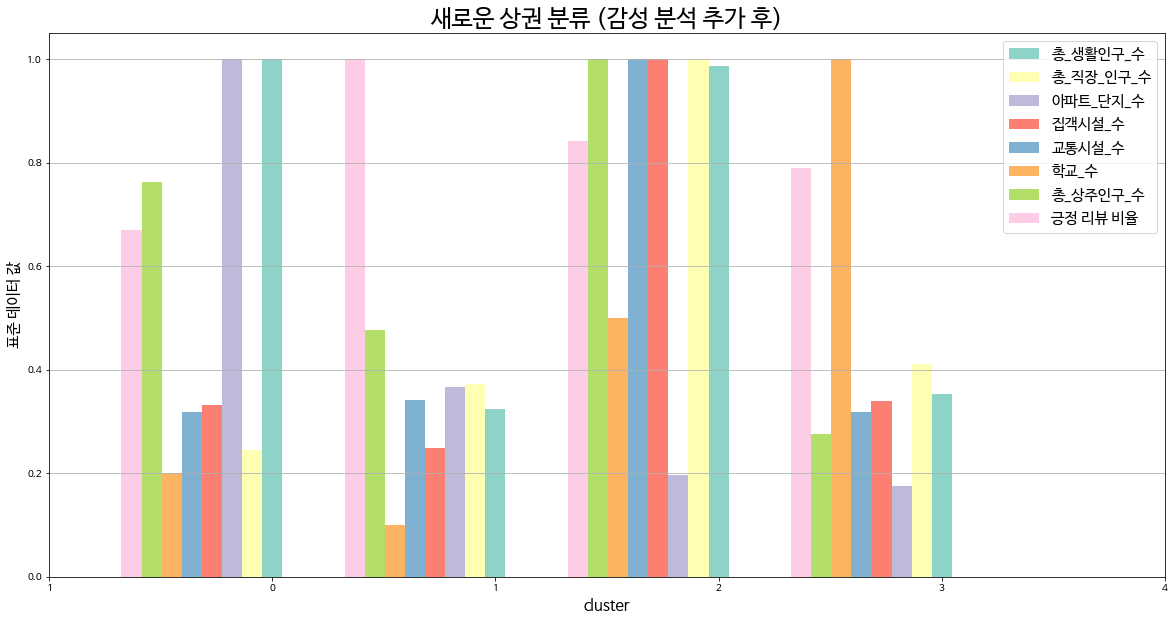

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
color = sns.color_palette("Set3", len(num_data.columns))

for idx, column in enumerate(num_columns):
  plt.bar(num_data['cluster_posneg'] - idx * 0.09, num_data[column], label=column, width=0.09, color=color[idx])

plt.title('새로운 상권 분류 (감성 분석 추가 후)', fontsize=24)
plt.legend(fontsize=15)
plt.grid(True, axis='y')
plt.xticks([-1, 0, 1, 2, 3, 4])
plt.xlabel('cluster', fontsize=15)
plt.ylabel('표준 데이터 값', fontsize=15)

<br>
<br>

## 2. K-Means Clustering 결과 분석

### 2-1. Cluster 0 분석 - 흰자

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area0 = num_data[num_data['cluster_posneg'] == 0].index

In [ ]:
area0_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])
for area in area0:
  area0_sales_data = area0_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area0_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
1,가로공원로76가길,골목상권,1.012329e+10,722503
2,가로공원로80길,골목상권,1.917132e+10,720964
5,가산로5길,골목상권,1.482576e+10,1353409
7,가좌로7길,골목상권,1.439221e+10,1022825
9,갈현로33길,골목상권,1.095064e+10,801965


In [ ]:
area0_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area0_sales_data_posneg.csv')

In [ ]:
area0_data = num_data[num_data['cluster_posneg'] == 0][['긍정 리뷰 비율',	'cluster_posneg']]
area0_data['cluster'] = ['0'] * len(area0_data)
for i in range(len(area0_data)):
  cluster = str(int(area_data[area_data['상권_코드_명'] == area0_data.index[i]]['cluster']))
  if cluster == '0':
    area0_data['cluster'][i] = '노른자'
  elif cluster == '1':
    area0_data['cluster'][i] = '스크램블'
  elif cluster == '2':
    area0_data['cluster'][i] = '오믈렛'
  else:
    area0_data['cluster'][i] = '흰자'

In [ ]:
area0_data['상권_코드_명'] = area0_data.index
area0_data = area0_data.reset_index(drop=True)

In [ ]:
area0_data.head()

,긍정 리뷰 비율,cluster_posneg,cluster,상권_코드_명
0,0.339,0,스크램블,가로공원로76가길
1,0.339,0,스크램블,가로공원로80길
2,0.371,0,스크램블,가산로5길
3,0.417,0,스크램블,가좌로7길
4,0.474,0,흰자,갈현로33길


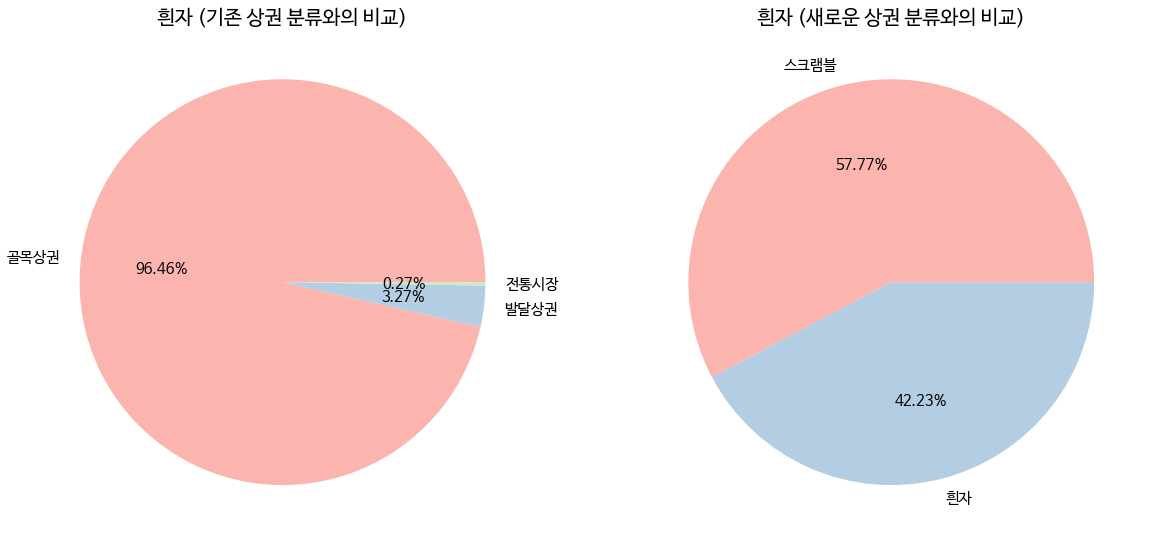

In [ ]:
color = sns.color_palette("Pastel1", 4)

plt.subplot(121)
plt.rcParams['font.size'] = 15
plt.title('흰자 (기존 상권 분류와의 비교)', fontsize=20)
plt.pie(area0_sales_data['상권_구분_코드_명'].value_counts(), labels=area0_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')

plt.subplot(122)
plt.rcParams['font.size'] = 15
plt.title('흰자 (새로운 상권 분류와의 비교)', fontsize=20)
plt.pie(area0_data['cluster'].value_counts(), labels=area0_data['cluster'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>

### 2-2. Cluster 1 분석 - 스크램블

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area1 = num_data[num_data['cluster_posneg'] == 1].index

In [ ]:
area1_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])
for area in area1:
  area1_sales_data = area1_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area1_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
6,가재울로6길,골목상권,2.910669e+10,1858077
8,갈현로1길,골목상권,2.043329e+10,1404106
11,갈현로7길,골목상권,1.723878e+10,1552600
993,강남구 논현역_1,발달상권,2.390240e+11,8611491
999,강서구청,발달상권,1.037168e+11,5637951


In [ ]:
area1_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area1_sales_data_posneg.csv')

In [ ]:
area1_data = num_data[num_data['cluster_posneg'] == 1][['긍정 리뷰 비율',	'cluster_posneg']]
area1_data['cluster'] = ['0'] * len(area1_data)
for i in range(len(area1_data)):
  cluster = str(int(area_data[area_data['상권_코드_명'] == area1_data.index[i]]['cluster']))
  if cluster == '0':
    area1_data['cluster'][i] = '노른자'
  elif cluster == '1':
    area1_data['cluster'][i] = '스크램블'
  elif cluster == '2':
    area1_data['cluster'][i] = '오믈렛'
  else:
    area1_data['cluster'][i] = '흰자'

In [ ]:
area1_data['상권_코드_명'] = area1_data.index
area1_data = area1_data.reset_index(drop=True)

In [ ]:
area1_data.head()

,긍정 리뷰 비율,cluster_posneg,cluster,상권_코드_명
0,1.0,1,스크램블,가재울로6길
1,1.0,1,스크램블,갈현로1길
2,1.0,1,스크램블,갈현로7길
3,1.0,1,스크램블,강남구 논현역_1
4,1.0,1,스크램블,강서구청


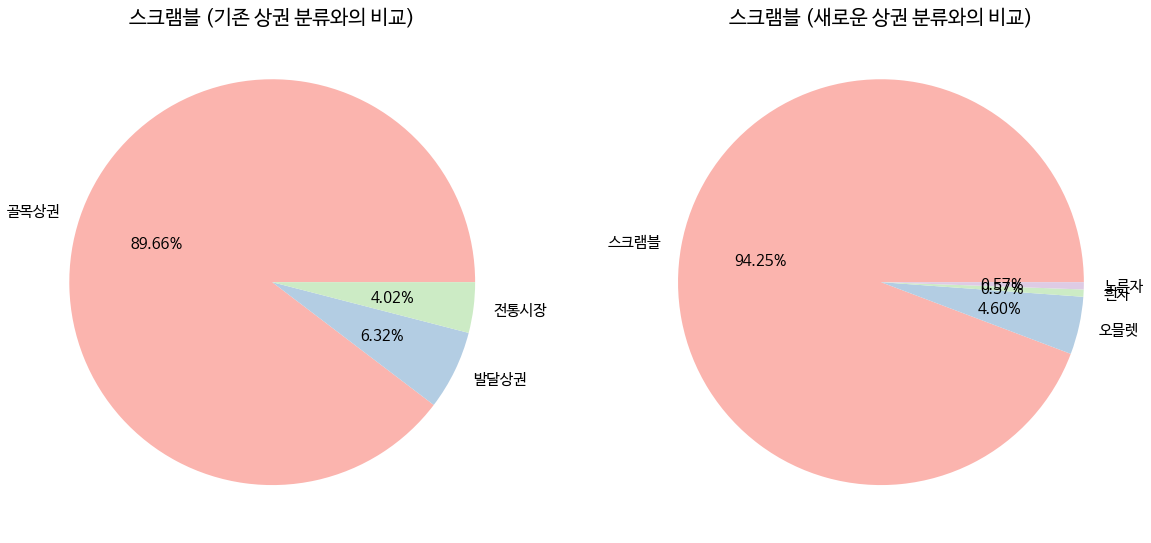

In [ ]:
plt.subplot(121)
plt.rcParams['font.size'] = 15
plt.title('스크램블 (기존 상권 분류와의 비교)', fontsize=20)
plt.pie(area1_sales_data['상권_구분_코드_명'].value_counts(), labels=area1_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')

plt.subplot(122)
plt.rcParams['font.size'] = 15
plt.title('스크램블 (새로운 상권 분류와의 비교)', fontsize=20)
plt.pie(area1_data['cluster'].value_counts(), labels=area1_data['cluster'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>

### 2-3. Cluster 2 분석 - 노른자

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area2 = num_data[num_data['cluster_posneg'] == 2].index

In [ ]:
area2_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])
for area in area2:
  area2_sales_data = area2_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area2_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
991,가산디지털단지역_2,발달상권,3.647797e+11,16450902
992,가산디지털단지역_3,발달상권,9.858932e+11,29600789
994,강남구 논현역_2,발달상권,4.462512e+11,15967853
1006,교대역_1,발달상권,2.692589e+11,9766852
1009,구로디지탈1단지,발달상권,5.310292e+11,23600186


In [ ]:
area2_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area2_sales_data_posneg.csv')

In [ ]:
area2_data = num_data[num_data['cluster_posneg'] == 2][['긍정 리뷰 비율',	'cluster_posneg']]
area2_data['cluster'] = ['0'] * len(area2_data)
for i in range(len(area2_data)):
  cluster = str(int(area_data[area_data['상권_코드_명'] == area2_data.index[i]]['cluster']))
  if cluster == '0':
    area2_data['cluster'][i] = '노른자'
  elif cluster == '1':
    area2_data['cluster'][i] = '스크램블'
  elif cluster == '2':
    area2_data['cluster'][i] = '오믈렛'
  else:
    area2_data['cluster'][i] = '흰자'

In [ ]:
area2_data['상권_코드_명'] = area2_data.index
area2_data = area2_data.reset_index(drop=True)

In [ ]:
area2_data.head()

,긍정 리뷰 비율,cluster_posneg,cluster,상권_코드_명
0,0.487,2,노른자,가산디지털단지역_2
1,0.487,2,노른자,가산디지털단지역_3
2,0.717,2,노른자,강남구 논현역_2
3,0.608,2,노른자,교대역_1
4,0.163,2,노른자,구로디지탈1단지


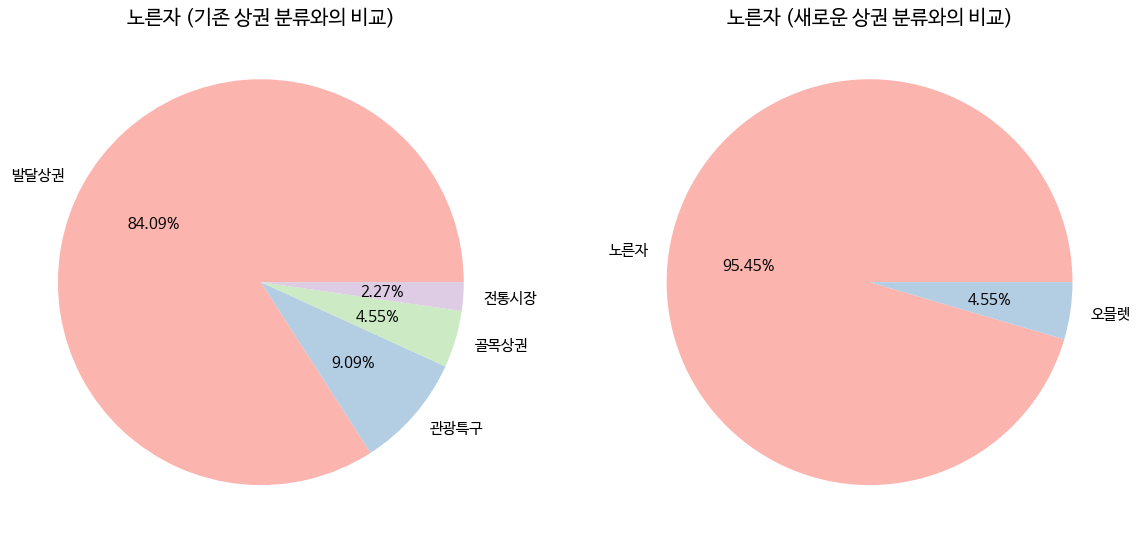

In [ ]:
plt.subplot(121)
plt.rcParams['font.size'] = 15
plt.title('노른자 (기존 상권 분류와의 비교)', fontsize=20)
plt.pie(area2_sales_data['상권_구분_코드_명'].value_counts(), labels=area2_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')

plt.subplot(122)
plt.rcParams['font.size'] = 15
plt.title('노른자 (새로운 상권 분류와의 비교)', fontsize=20)
plt.pie(area2_data['cluster'].value_counts(), labels=area2_data['cluster'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>

### 2-4. Cluster 3 분석 - 오믈렛

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area3 = num_data[num_data['cluster_posneg'] == 3].index

In [ ]:
area3_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])
for area in area3:
  area3_sales_data = area3_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area3_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
0,가로공원로58길,골목상권,2.616995e+09,228566
3,가마산로61길,골목상권,4.668594e+09,277527
4,가산로3길,골목상권,2.983898e+10,719243
1186,강남골목시장,전통시장,2.336485e+10,1541447
995,강남구 논현역_3,발달상권,6.594852e+10,1045236


In [ ]:
area3_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area3_sales_data_posneg.csv')

In [ ]:
area3_data = num_data[num_data['cluster_posneg'] == 3][['긍정 리뷰 비율',	'cluster_posneg']]
area3_data['cluster'] = ['0'] * len(area3_data)
for i in range(len(area3_data)):
  cluster = str(int(area_data[area_data['상권_코드_명'] == area3_data.index[i]]['cluster']))
  if cluster == '0':
    area3_data['cluster'][i] = '노른자'
  elif cluster == '1':
    area3_data['cluster'][i] = '스크램블'
  elif cluster == '2':
    area3_data['cluster'][i] = '오믈렛'
  else:
    area3_data['cluster'][i] = '흰자'

In [ ]:
area3_data['상권_코드_명'] = area3_data.index
area3_data = area3_data.reset_index(drop=True)

In [ ]:
area3_data.head()

,긍정 리뷰 비율,cluster_posneg,cluster,상권_코드_명
0,0.399,3,스크램블,가로공원로58길
1,0.392,3,오믈렛,가마산로61길
2,0.374,3,오믈렛,가산로3길
3,0.674,3,오믈렛,강남골목시장
4,0.416,3,오믈렛,강남구 논현역_3


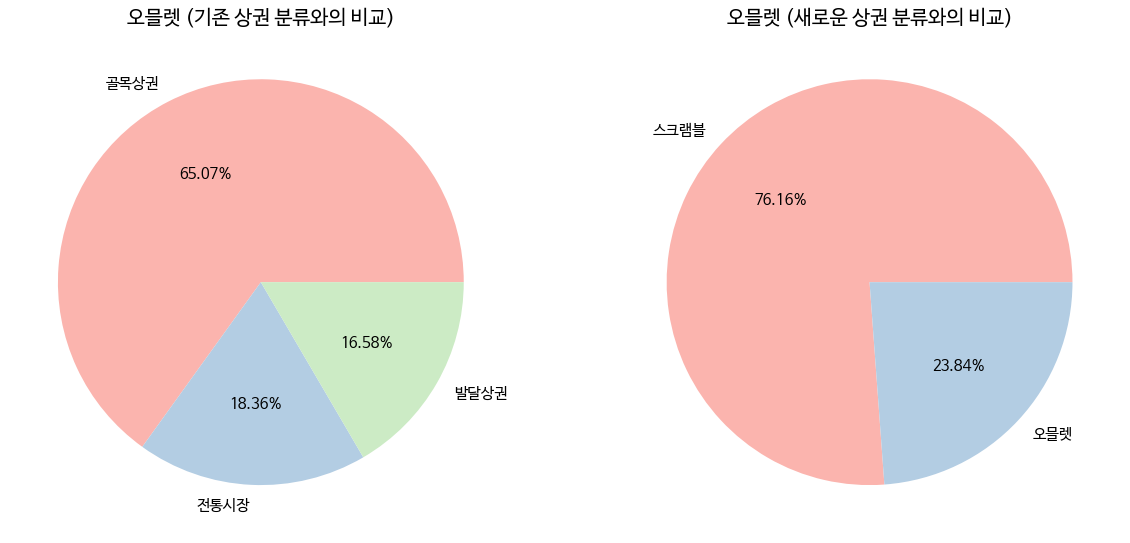

In [ ]:
plt.subplot(121)
plt.rcParams['font.size'] = 15
plt.title('오믈렛 (기존 상권 분류와의 비교)', fontsize=20)
plt.pie(area3_sales_data['상권_구분_코드_명'].value_counts(), labels=area3_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')

plt.subplot(122)
plt.rcParams['font.size'] = 15
plt.title('오믈렛 (새로운 상권 분류와의 비교)', fontsize=20)
plt.pie(area3_data['cluster'].value_counts(), labels=area3_data['cluster'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>
<br>

## 3. 상권 분류 별 비교

매출 금액, 매출 건수 비교

<br>

### 3-1. 매출 금액 비교

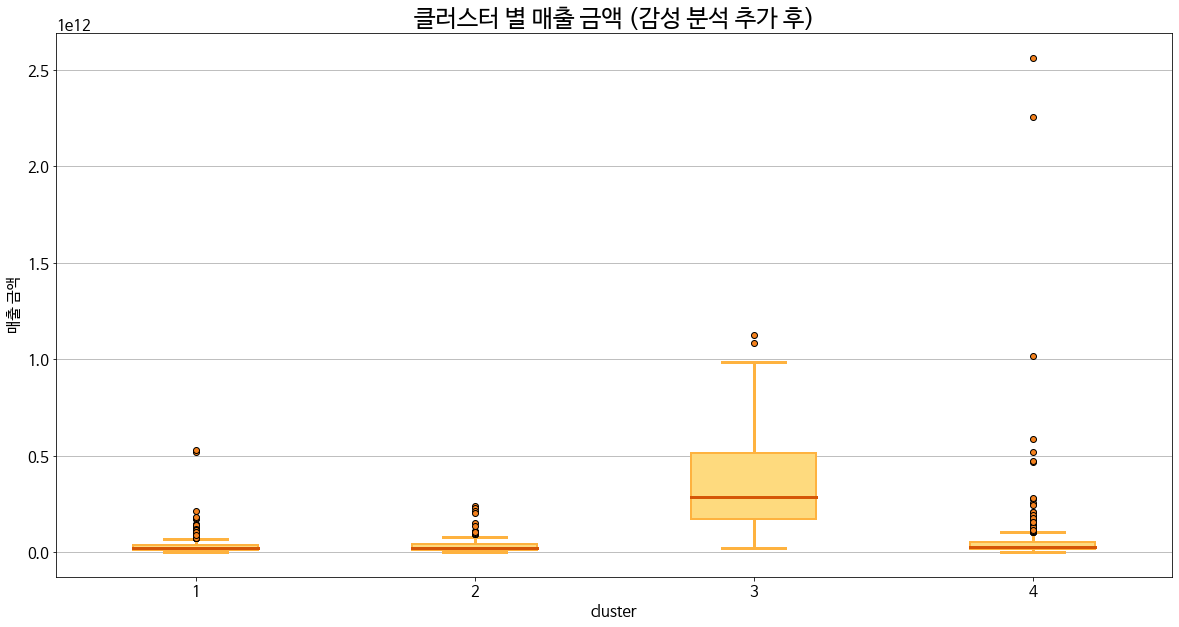

In [ ]:
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['매출_금액'],area1_sales_data['매출_금액'], area2_sales_data['매출_금액'],area3_sales_data['매출_금액']], 
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('클러스터 별 매출 금액 (감성 분석 추가 후)', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('cluster', fontsize=15)
plt.ylabel('매출 금액', fontsize=15)
plt.show()

<br>

### 3-2. 매출 건수 비교

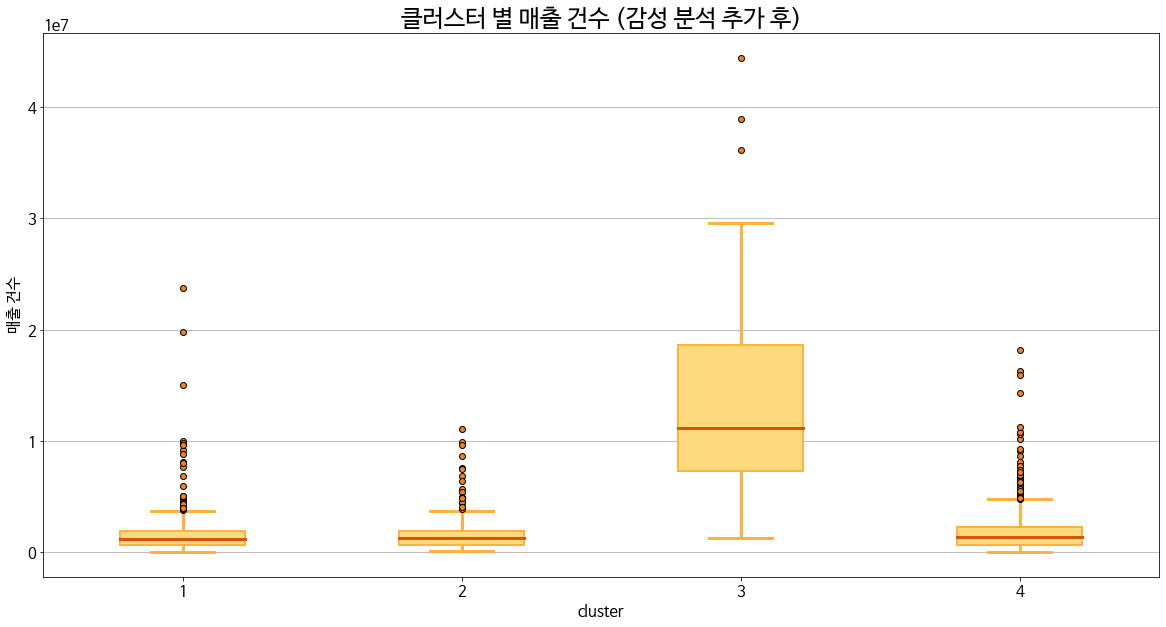

In [ ]:
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['매출_건수'],area1_sales_data['매출_건수'], area2_sales_data['매출_건수'],area3_sales_data['매출_건수']], 
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('클러스터 별 매출 건수 (감성 분석 추가 후)', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('cluster', fontsize=15)
plt.ylabel('매출 건수', fontsize=15)
plt.show()